<a href="https://colab.research.google.com/github/Jaythan07/Project_online_retail/blob/main/OnlineRetail_Cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online retail - Cohort Analysis

We start with **Cohort analysis**, we commonly segment customers by the date they onboard with the app/products,
with the assumption that each snapshot of time, we acquire a group of customers (as a cohort). The product offerings and marketing strategies are the same, so we expect customers in the same cohort are more or less comparable.

In fact, cohorts is not necessarily defined as the time of acquiring customers, but other given factors that make the group of customers more similar. The cohort by the starting time of customers give a view of how the product evolve over time, and how the customer base shift over time.


### I. What's cohort?
- *A cohort*: Individuals have some common in characteristics
	- For example, users acquired through a same marketing campaign at the same date
	- First batch of students of an online course
- Cohort analysis is a useful way to compare groups of entities over time
	- Provide a framework to **detect correlations between cohort characteristics and long-term trends** -> Hypotheses about the causal drivers.
	- Compare new cohorts of customers and compare to previous cohorts -> Alerts when something has gone wrong


### II. Components of Cohort Analysis

Cohort analyses have three components

1. `Cohort grouping`: often based on the start date (customer's first purchase, subscription date, the date a student started school, etc.)
2. Time series of data over which a cohort is observed:
    - A series of purchases, logins, interactions, Active Time Spent day-by-day after the start date
    - A series should cover the the entire life span (mature)
    - A series should be long enough to complete the action of interest -> For example, if customers tend to purchase once a month, a time series of several months is needed. If, on the other hand, purchases happen only once a year, a time series of several years would be preferable.
    - Period is relative to the start date (for example, day0, day1, day2, etc.)
3. Aggregate metrics that we want to measures: Retention, Revenue along the life-cycle. Any metrics that matters to the health of the business -> Aggregate `sum`, `count`, `average`

### III. Applications of Cohort Analysis

1. Customer Retention
Cohort analysis is widely employed to measure customer retention and loyalty. By grouping customers based on their sign-up or acquisition dates, businesses can track how engagement levels change over subsequent periods. This insight is crucial for refining strategies to retain and nurture long-term customer relationships.

2. Product Adoption and Engagement
Businesses can use cohort analysis to assess how different groups of users adopt new features or products. By understanding the engagement patterns within specific cohorts, organizations can tailor marketing efforts and improve user experiences to drive higher adoption rates.

3. Subscription Services
Cohort analysis is particularly valuable for businesses offering subscription services. By analyzing cohorts based on subscription start dates, companies can evaluate the retention and churn rates, enabling them to optimize pricing strategies, content offerings, and customer communication.

4. Marketing Campaign Performance
Marketers leverage cohort analysis to evaluate the effectiveness of marketing campaigns. By tracking user cohorts exposed to specific campaigns, businesses can measure the impact on acquisition, conversion, and long-term customer value, guiding future marketing strategies.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno
import openpyxl
import datetime as dt

In [ ]:
# OPTIONA:
import warnings
warnings.filterwarnings('ignore')

> Structure:
>
> Step 1: Load data
>
> Step 2: Data Explore
>
> Step 3: Clearning Data
>
> Step 4:. Prepare the data for Cohort Analysis
> - Flow 1: Invoice_period
> - Flow 2: Cohort_group
> - Flow 3: Aggregate Metric
> - Flow 4: Cohort_period
>
> Step 5. Cohort analysis


## Load Data

# Mục mới

In [ ]:
# TODO_01
raw_data = pd.read_excel('/content/Online Retail (2).xlsx', dtype={'CustomerID': str})

#dtype is a param to convert column CustomerID into str (before: float64)

In [ ]:
df = raw_data

In [ ]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
# TODO_02: Create order_value = Quantity x UnitPrice
df['order_value'] = df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Data Explore

In [ ]:
df.info()
#Have the first understanding about the dataframe, null or non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
 8   order_value  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [ ]:
df.describe().T
#Get overview about dataset

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
order_value,541909.0,17.987795,-168469.6,3.4,9.75,17.4,168469.6,378.810824


In [ ]:
df.describe(percentiles = [0.05,0.25,0.95]).T

,count,mean,min,5%,25%,50%,95%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,1.0,3.0,29.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2010-12-13 09:35:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-11-30 14:41:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,0.42,1.25,2.08,9.95,38970.0,96.759853
order_value,541909.0,17.987795,-168469.6,0.83,3.4,9.75,59.4,168469.6,378.810824


In [ ]:
# TODO_03: Using missingno to explore the missing values of datasets
miss_value = df.isna().sum()
# miss_value
df.replace('', np.NaN)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
order_value,0


# Mục mới

<Axes: >

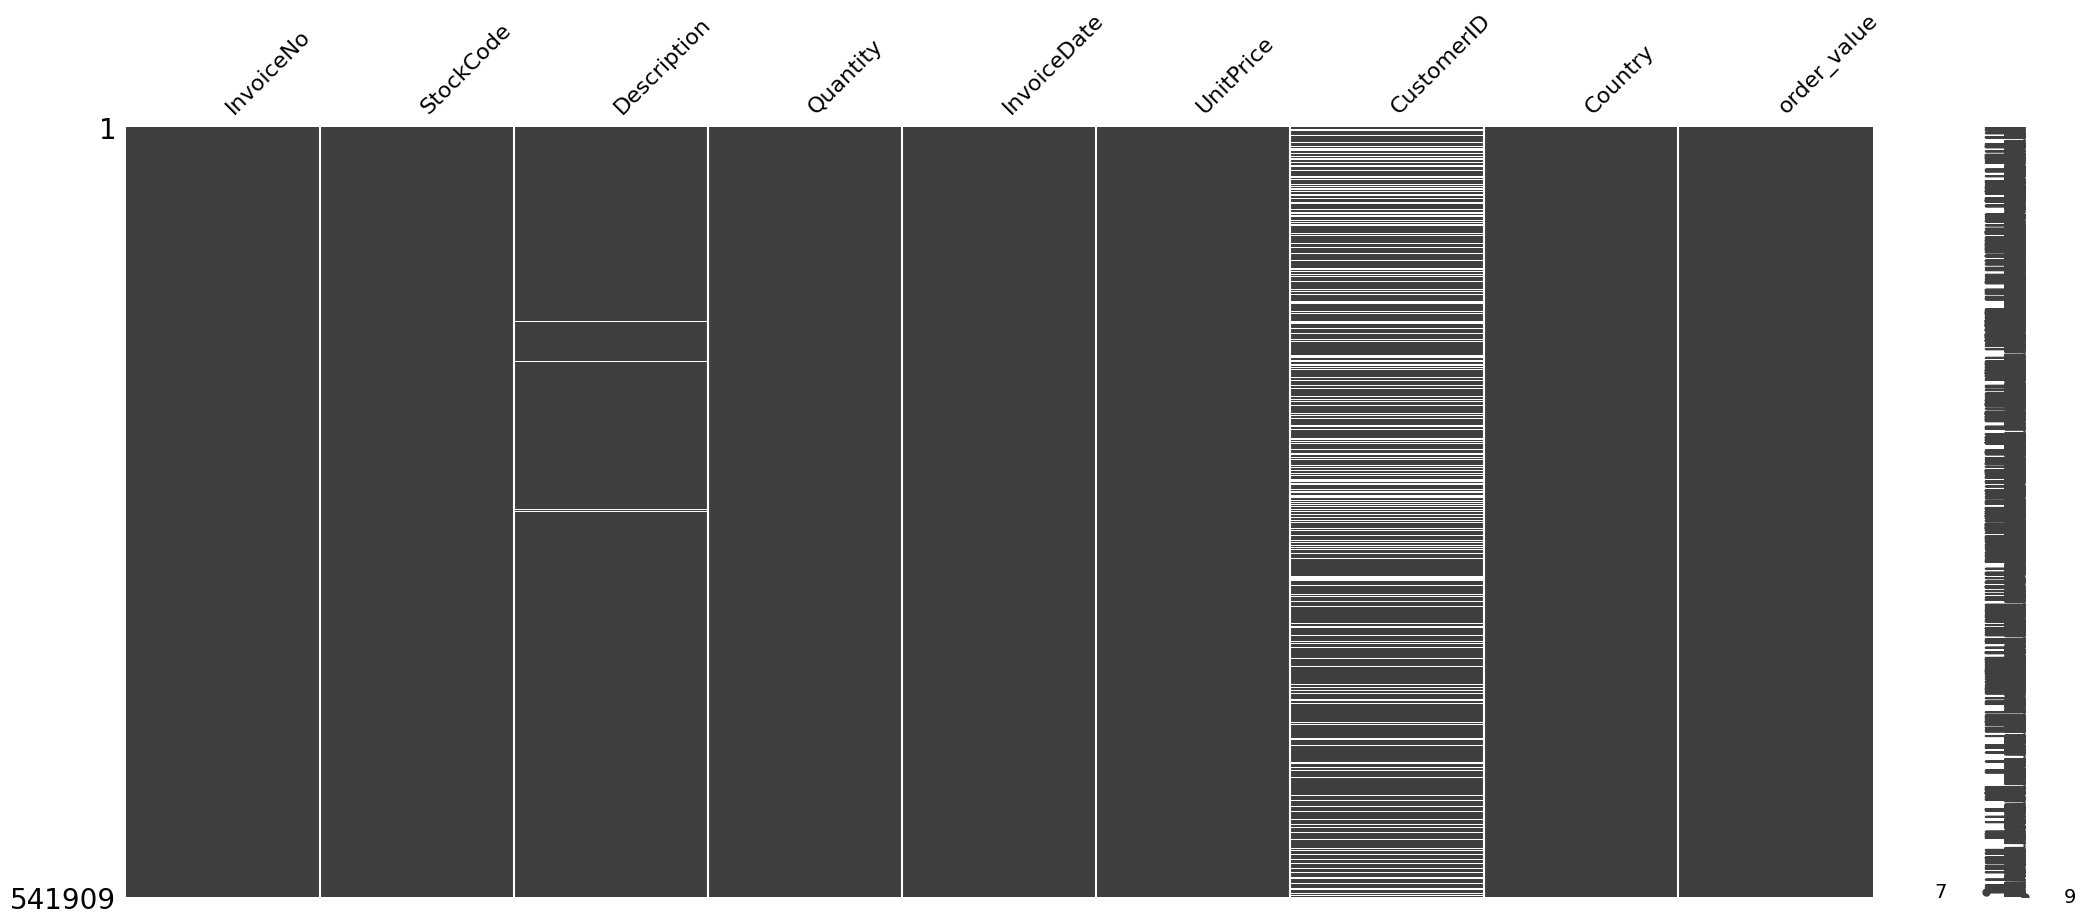

In [ ]:
missingno.matrix(df)

<Axes: >

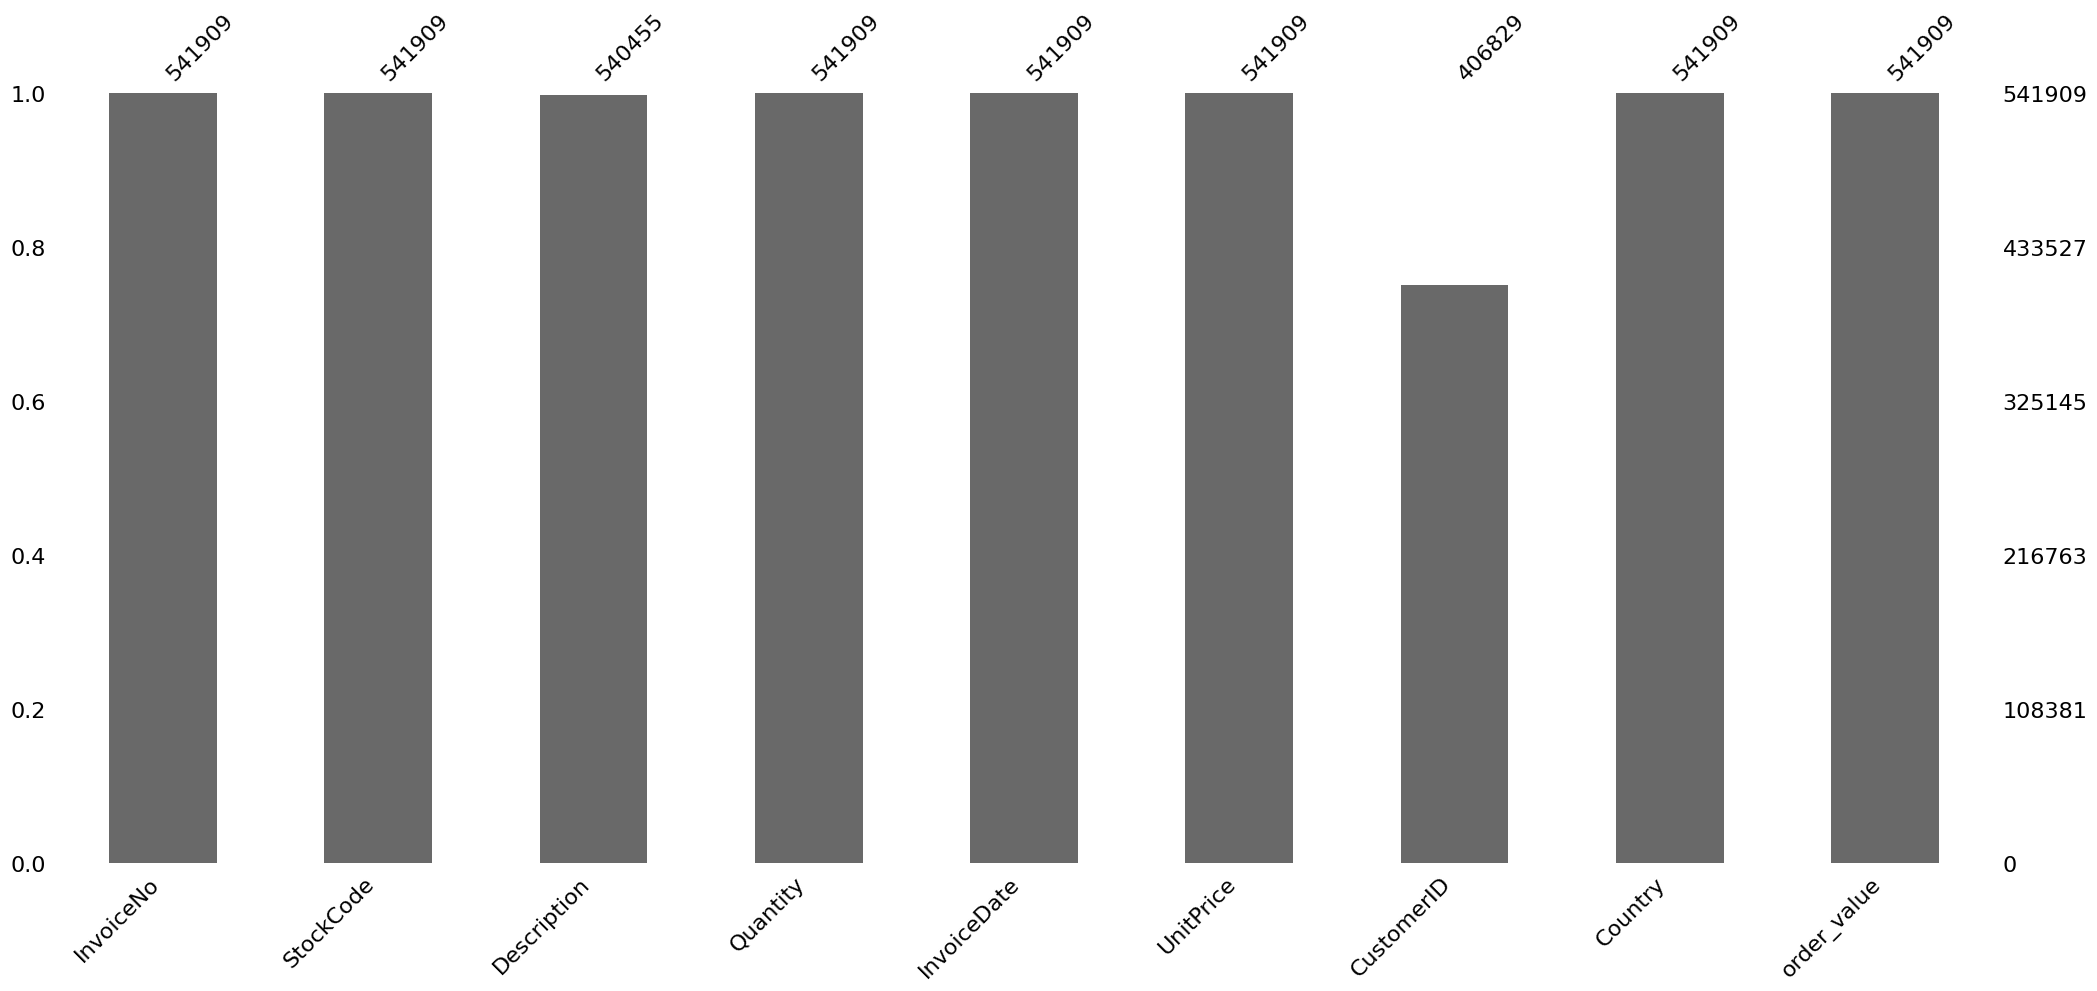

In [ ]:
missingno.bar(df)
#for details: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

## Cleaning Data

<Axes: >

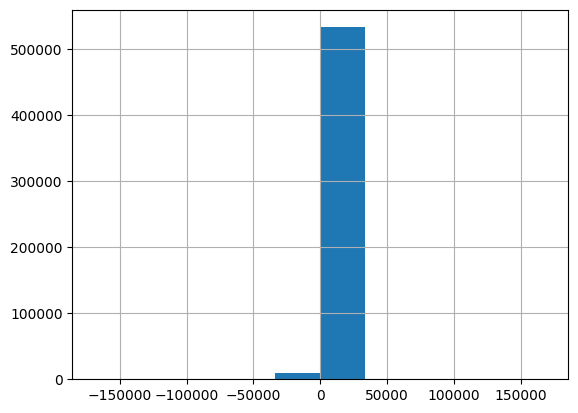

In [ ]:
#Deep-dive histogram of order_value
df.order_value.hist()

<Axes: >

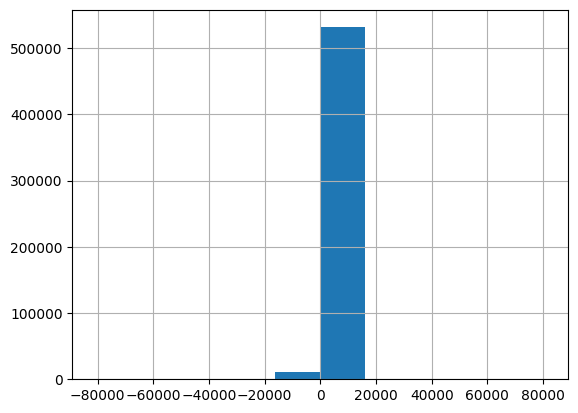

In [ ]:
#Deep-dive histogram of Quantity, there's some values which is < 0 and can not view distribution clearly
df.Quantity.hist()

In [ ]:
# We have some thresholds cap_90 (quanity & order_value)
quantity_cap_90 = df['Quantity'].quantile(0.95)
order_value_cap_90 = df['order_value'].quantile(0.95)

In [ ]:
# TODO_04: Look at histogram by .hist() above => Determine the outliers to filter the data
quantity_cap = quantity_cap_90
order_value_cap = order_value_cap_90
order_value_flr = 0
df2 = df[(df.Quantity <= quantity_cap) & (df.order_value <= order_value_cap) & (df.order_value > order_value_flr)]
# Quantity, UnitPrice, order_value are components which can not be NaN
df2.dropna(inplace=True)
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,363958.0,6.857203,1.0,2.0,4.0,12.0,29.0,6.545413
InvoiceDate,363958,2011-07-11 14:55:46.831117824,2010-12-01 08:26:00,2011-04-07 12:16:00,2011-08-01 13:11:00,2011-10-21 13:50:00,2011-12-09 12:50:00,NaN
UnitPrice,363958.0,2.866273,0.001,1.25,1.95,3.75,57.95,3.080768
order_value,363958.0,12.37118,0.001,4.2,10.2,17.4,59.4,10.110369


<Axes: >

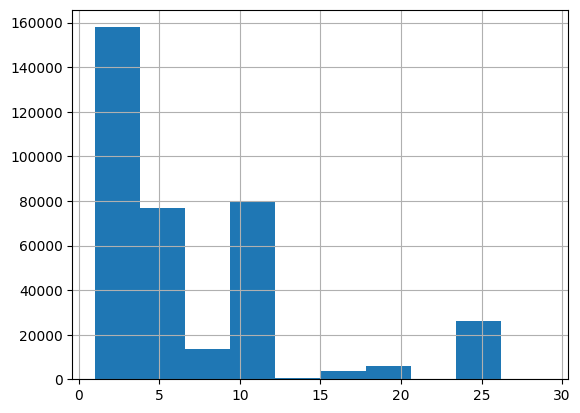

In [ ]:
df2.Quantity.hist()

In [ ]:
# type(df.InvoiceDate[0])
# df.Quantity[541904] => extract value in Quantity column with the 541904th values
# df.InvoiceDate[0] => the first value in InvoiceDate column

In [ ]:
def lambda_func(x:dt.datetime) -> str:
    return x.strftime('%Y-%m')

In [ ]:
# def cap_percentile(x: pd.Series, p_cap: float) -> pd.Series:
#     return x[x<= x.quantile(quantity_cap)]
# df.apply(lambda x: cap_percentile(x,order_value_cap=0.95), axis = 1)
# df.select_dtypes('float').apply(lambda x: cap_percentile(x,p_cap=0.95),axis = 1)

## Prepare the Data for Cohort Analysis

### Step 1. `invoice_period`

Generate the invoice_period by extracting Year-Month of InvoiceDate. By this, we change the frequency from Daily to Monthly.

In [ ]:
df2['invoice_period'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_value,invoice_period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


### Step 2. `cohort_group`

- Set index to `CustomerID`
- `groupby(level=0)` which is equivalent to groupby `CustomerID`
- Remember the reset the index

> Discussion: What happend if we do not set the index and `groupby(level=0)`? Hint: Try to run `groupby('CustomerID')` directly?

In [ ]:
# groupby will return the series with length shorter the the original, by the trick of set index, it enables us to group by, keep the original length
df2.set_index('CustomerID', inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,order_value,invoice_period
CustomerID,,,,,,,,,
17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12
17850,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12
17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12


In [ ]:
# TODO_05: From the code below, how the cohort_group is defined?
# df2['cohort_group'] = df2.groupby(level=0)['InvoiceDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df2['cohort_group'] = df2.groupby(level=0)['InvoiceDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df2.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,order_value,invoice_period,cohort_group
CustomerID,,,,,,,,,,
17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
17850,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,United Kingdom,15.30,2010-12,2010-12
17850,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,United Kingdom,25.50,2010-12,2010-12
17850,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,United Kingdom,11.10,2010-12,2010-12
17850,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,United Kingdom,11.10,2010-12,2010-12


In [ ]:
df2.reset_index(inplace=True)
df2.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,order_value,invoice_period,cohort_group
0,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
1,17850,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
2,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
3,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
4,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12


### Step 3. Aggregate Metrics

In [ ]:
# TODO_06:
# Later, we want to visualize the activities of customers (in terms of quantity & value)
# month-over-month and split by cohorts
# WHAT we should pass on groupby?

g = df2.groupby(['cohort_group','invoice_period'])
cohorts = g.agg({
    'CustomerID': pd.Series.nunique,
    'Description': pd.Series.nunique,
    'Quantity': np.sum,
    'order_value': np.sum
})
cohorts.rename(columns={
    'CustomerID':'cust_cnt',
    'Description':'product_item_cnt',
    'Quantity':'total_quant',
    'order_value':'total_value'
}, inplace=True)
cohorts.head()

cust_cnt  product_item_cnt  total_quant  \
cohort_group invoice_period                                            
2010-12      2010-12              829              2368       147428   
             2011-01              298              1709        65845   
             2011-02              254              1617        50311   
             2011-03              306              1787        65749   
             2011-04              292              1731        59234   

                             total_value  
cohort_group invoice_period               
2010-12      2010-12           292102.91  
             2011-01           117929.78  
             2011-02            91626.02  
             2011-03           117187.14  
             2011-04           103408.53

In [ ]:
cohorts.head()

cust_cnt  product_item_cnt  total_quant  \
cohort_group invoice_period                                            
2010-12      2010-12              829              2368       147428   
             2011-01              298              1709        65845   
             2011-02              254              1617        50311   
             2011-03              306              1787        65749   
             2011-04              292              1731        59234   

                             total_value  
cohort_group invoice_period               
2010-12      2010-12           292102.91  
             2011-01           117929.78  
             2011-02            91626.02  
             2011-03           117187.14  
             2011-04           103408.53

In [ ]:
cohorts_1 = cohorts.copy()

In [ ]:
cohorts_1.head()

cust_cnt  product_item_cnt  total_quant  \
cohort_group invoice_period                                            
2010-12      2010-12              829              2368       147428   
             2011-01              298              1709        65845   
             2011-02              254              1617        50311   
             2011-03              306              1787        65749   
             2011-04              292              1731        59234   

                             total_value  
cohort_group invoice_period               
2010-12      2010-12           292102.91  
             2011-01           117929.78  
             2011-02            91626.02  
             2011-03           117187.14  
             2011-04           103408.53

### Step 4. `cohort_period`

We want to count the transaction month relative from cohort_date (ie. 1, 2, 3 month after the date of acquired - cohort_date)

In [ ]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df.reset_index(level=0, drop=True)  # Drop the extra cohort_group level

# def cohort_period(df):
#   df['cohort_period'] = np.arange(len(df)) + 1
#   return df

In [ ]:
cohorts_1 = cohorts_1.groupby(level=0).apply(cohort_period) # level 0: cohort_group, apply for each row (invoice_periods)

In [ ]:
cohorts_1.head(5)

cust_cnt  product_item_cnt  total_quant  \
cohort_group invoice_period                                            
2010-12      2010-12              829              2368       147428   
             2011-01              298              1709        65845   
             2011-02              254              1617        50311   
             2011-03              306              1787        65749   
             2011-04              292              1731        59234   

                             total_value  cohort_period  
cohort_group invoice_period                              
2010-12      2010-12           292102.91              1  
             2011-01           117929.78              2  
             2011-02            91626.02              3  
             2011-03           117187.14              4  
             2011-04           103408.53              5

In [ ]:
cohorts_1 = cohorts_1.reset_index(level=['invoice_period'])
cohorts_1 = cohorts_1.set_index(['cohort_period'], append=True)

In [ ]:
cohorts_1.head()

invoice_period  cust_cnt  product_item_cnt  \
cohort_group cohort_period                                              
2010-12      1                    2010-12       829              2368   
             2                    2011-01       298              1709   
             3                    2011-02       254              1617   
             4                    2011-03       306              1787   
             5                    2011-04       292              1731   

                            total_quant  total_value  
cohort_group cohort_period                            
2010-12      1                   147428    292102.91  
             2                    65845    117929.78  
             3                    50311     91626.02  
             4                    65749    117187.14  
             5                    59234    103408.53

In [ ]:
cohorts_1.groupby(level=0).apply(lambda x: print(x))

                           invoice_period  cust_cnt  product_item_cnt  \
cohort_group cohort_period                                              
2010-12      1                    2010-12       829              2368   
             2                    2011-01       298              1709   
             3                    2011-02       254              1617   
             4                    2011-03       306              1787   
             5                    2011-04       292              1731   
             6                    2011-05       325              1779   
             7                    2011-06       297              1798   
             8                    2011-07       274              1882   
             9                    2011-08       281              1863   
             10                   2011-09       311              2053   
             11                   2011-10       298              2007   
             12                   2011-11       409

""


In [ ]:
# # cohorts.reset_index(inplace=True)
# cohorts.set_index(['cohort_group','invoice_period'], inplace=True)
# cohorts.head()

In [ ]:
# # cohorts.reset_index(inplace=True)
# cohorts.set_index(['cohort_period','cohort_group'], inplace=True)
# cohorts.head()

## Cohort Analysis

### Monthly Total Sales Across Cohorts

In [ ]:
cohorts_1['total_value'].unstack(0)

cohort_group,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
cohort_period,,,,,,,,,,,,,
1,292102.91,125905.880,114794.18,142649.07,92425.771,81077.16,66156.30,57148.941,61765.70,104583.791,125693.51,99566.49,7972.4
2,117929.78,27304.900,15539.71,19518.98,18431.350,12206.94,8161.62,7547.660,15289.16,23616.130,31833.60,9052.57,NaN
3,91626.02,32484.030,21563.95,35588.41,16561.830,13128.47,10024.55,13740.960,29383.18,29137.550,8631.65,NaN,NaN
4,117187.14,24270.350,35076.76,30444.85,17549.160,14104.62,18874.46,15899.980,31377.65,10965.190,NaN,NaN,NaN
5,103408.53,44771.550,30208.79,30086.25,16852.720,22318.23,19294.91,16522.410,11838.62,NaN,NaN,NaN,NaN
6,133159.81,39865.020,23709.98,28636.91,24031.660,26104.53,26721.20,5300.090,NaN,NaN,NaN,NaN,NaN
7,117402.13,33324.820,30447.09,42499.64,23466.140,25302.55,5597.00,NaN,NaN,NaN,NaN,NaN,NaN
8,116666.19,34635.370,41752.46,45260.40,26365.590,8721.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,117469.70,46898.561,37182.50,48324.58,5611.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Thay đổi thứ tự unstack để đảo trục
unstacked_value = cohorts_1['total_value'].unstack(1)
unstacked_value

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_group,,,,,,,,,,,,,
2010-12,292102.910,117929.78,91626.02,117187.14,103408.53,133159.81,117402.13,116666.19,117469.700,155671.97,146594.96,222714.09,76778.23
2011-01,125905.880,27304.90,32484.03,24270.35,44771.55,39865.02,33324.82,34635.37,46898.561,58996.98,66760.29,13435.12,NaN
2011-02,114794.180,15539.71,21563.95,35076.76,30208.79,23709.98,30447.09,41752.46,37182.500,39423.09,7296.17,NaN,NaN
2011-03,142649.070,19518.98,35588.41,30444.85,30086.25,28636.91,42499.64,45260.40,48324.580,9264.62,NaN,NaN,NaN
2011-04,92425.771,18431.35,16561.83,17549.16,16852.72,24031.66,23466.14,26365.59,5611.980,NaN,NaN,NaN,NaN
2011-05,81077.160,12206.94,13128.47,14104.62,22318.23,26104.53,25302.55,8721.15,NaN,NaN,NaN,NaN,NaN
2011-06,66156.300,8161.62,10024.55,18874.46,19294.91,26721.20,5597.00,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,57148.941,7547.66,13740.96,15899.98,16522.41,5300.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,61765.700,15289.16,29383.18,31377.65,11838.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


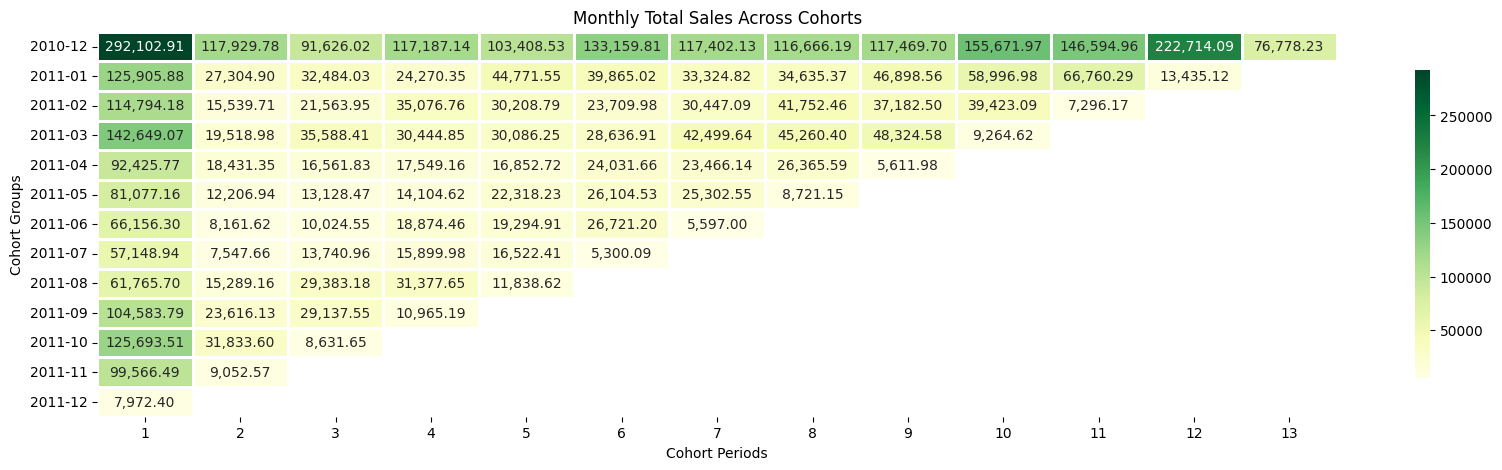

In [ ]:
# Vẽ heatmap với cohort_group trên trục y và cohort_period trên trục x
plt.figure(figsize=(20, 5))
ax = sns.heatmap(unstacked_value, annot=True, cmap='YlGn', fmt=",.2f",
                 linewidths=1,
                 cbar_kws={"shrink": .8})
ax.set_ylabel('Cohort Groups')  # Cohort Groups trên trục Y
ax.set_xlabel('Cohort Periods')  # Cohort Periods trên trục X
ax.set_title('Monthly Total Sales Across Cohorts')  # Tiêu đề biểu đồ
plt.show()


### Retention

> Retention of each cohort over time (periods) is the number of active users at each period, divide for the cohort size (= user count in first periods)
- Size of cohort (`denomiator`)
- Spread the `cust_cnt` - active users over periods of each cohorts
- Divide for the **retention rate**: `cust_retention.divide(cohorts_size, axis=0)`

In [ ]:
cohorts_2 = cohorts_1.copy()

In [ ]:
# # TODO_08: With the piece of code below, how the cohorts size is defined?
# cohorts_size = cohorts_2.groupby(level=1)['cust_cnt'].first()
# cohorts_size

In [ ]:
cust_retention = cohorts_2['cust_cnt'].unstack(1)
cust_retention.head(20)

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_group,,,,,,,,,,,,,
2010-12,829.0,298.0,254.0,306.0,292.0,325.0,297.0,274.0,281.0,311.0,298.0,409.0,210.0
2011-01,398.0,83.0,107.0,88.0,130.0,115.0,99.0,99.0,125.0,132.0,148.0,48.0,NaN
2011-02,358.0,59.0,65.0,97.0,96.0,88.0,87.0,94.0,91.0,107.0,24.0,NaN,NaN
2011-03,439.0,65.0,108.0,86.0,99.0,75.0,111.0,102.0,119.0,38.0,NaN,NaN,NaN
2011-04,294.0,57.0,57.0,57.0,55.0,66.0,64.0,75.0,21.0,NaN,NaN,NaN,NaN
2011-05,279.0,52.0,50.0,46.0,60.0,62.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06,239.0,42.0,37.0,63.0,54.0,78.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,193.0,31.0,42.0,45.0,54.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,165.0,32.0,42.0,40.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # TODO_08: With the piece of code below, how the cohorts size is defined?
cohorts_size = cohorts_2.groupby(level=0)['cust_cnt'].first()
cohorts_size

,cust_cnt
cohort_group,
2010-12,829
2011-01,398
2011-02,358
2011-03,439
2011-04,294
2011-05,279
2011-06,239
2011-07,193
2011-08,165


In [ ]:
# Chia từng giá trị trong cust_retention cho cohort_size
cust_retention = cust_retention.divide(cohorts_size, axis=0)
cust_retention
# Hiển thị kết quả
# print(cust_retention)


cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_group,,,,,,,,,,,,,
2010-12,1.0,0.359469,0.306393,0.369119,0.352232,0.392039,0.358263,0.330519,0.338963,0.375151,0.359469,0.493366,0.253317
2011-01,1.0,0.208543,0.268844,0.221106,0.326633,0.288945,0.248744,0.248744,0.314070,0.331658,0.371859,0.120603,NaN
2011-02,1.0,0.164804,0.181564,0.270950,0.268156,0.245810,0.243017,0.262570,0.254190,0.298883,0.067039,NaN,NaN
2011-03,1.0,0.148064,0.246014,0.195900,0.225513,0.170843,0.252847,0.232346,0.271071,0.086560,NaN,NaN,NaN
2011-04,1.0,0.193878,0.193878,0.193878,0.187075,0.224490,0.217687,0.255102,0.071429,NaN,NaN,NaN,NaN
2011-05,1.0,0.186380,0.179211,0.164875,0.215054,0.222222,0.268817,0.093190,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.175732,0.154812,0.263598,0.225941,0.326360,0.100418,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.160622,0.217617,0.233161,0.279793,0.124352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.193939,0.254545,0.242424,0.139394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


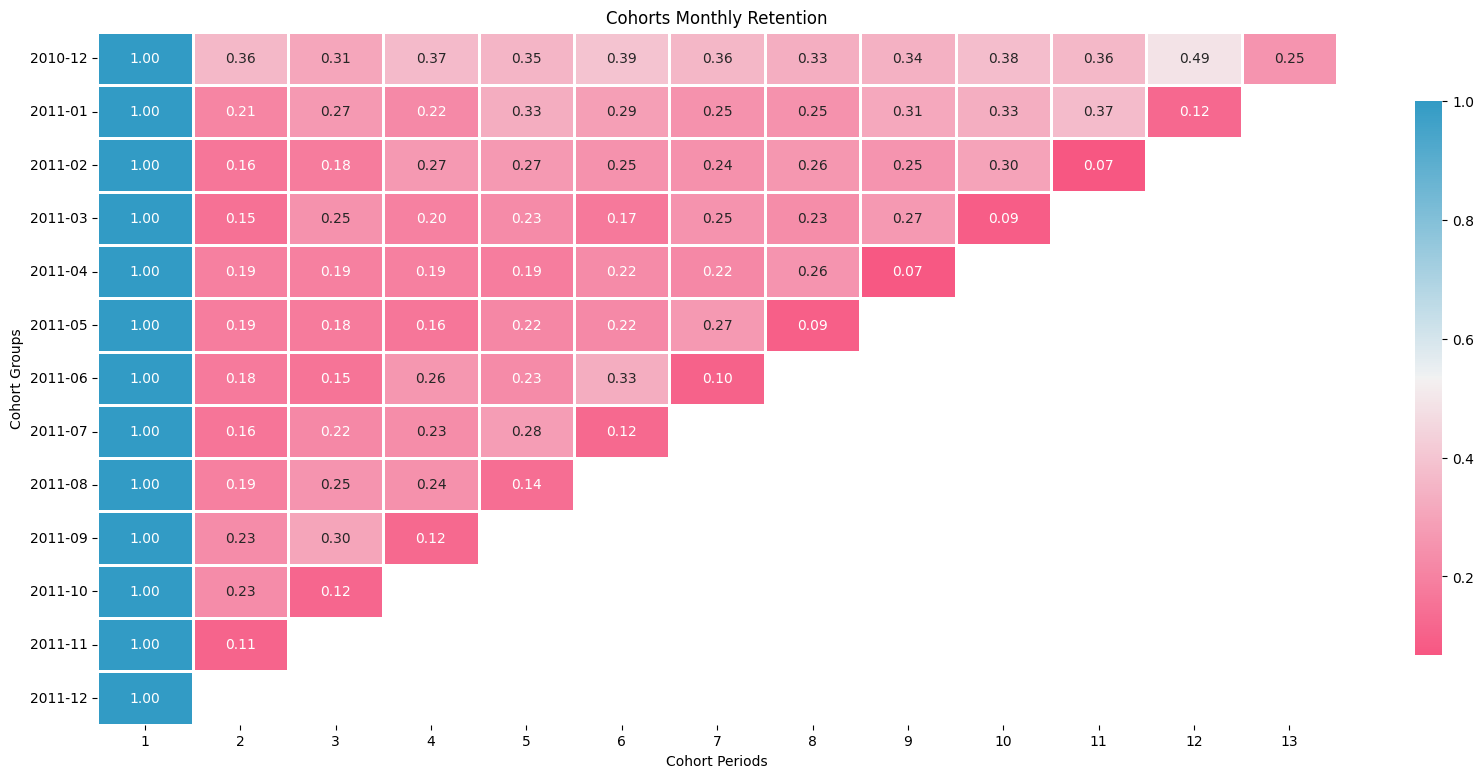

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo heatmap với dữ liệu hiện tại
plt.figure(figsize=(20, 9))  # Điều chỉnh kích thước biểu đồ
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# Vẽ heatmap
ax = sns.heatmap(cust_retention, annot=True, cmap=cmap, fmt=".2f",
                 linewidths=1, cbar_kws={"shrink": .8})


# Cấu hình nhãn và tiêu đề
ax.set_ylabel('Cohort Groups')  # Cohort Groups ở trục Y
ax.set_xlabel('Cohort Periods')  # Cohort Periods ở trục X
ax.set_title('Cohorts Monthly Retention')  # Tiêu đề biểu đồ

plt.show()

# plt.figure(figsize=(20,9))
# cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# ax = sns.heatmap(cust_retention, annot=True, cmap=cmap,fmt=".2f",
#            linewidths=1,
#            cbar_kws={"shrink": .8})
# ax.set_ylabel('Cohort Groups')
# ax.set_xlabel('Cohort Periods')
# ax.set_title('Cohorts Monhtly Retention')

In [ ]:
df3 = df2.copy()
df3.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,order_value,invoice_period,cohort_group
0,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
1,17850,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
2,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
3,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
4,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12


In [ ]:
a = df3.groupby(['cohort_group','invoice_period'])
b = a.agg({
    'CustomerID': pd.Series.nunique,
    'Description': pd.Series.nunique,
    'Quantity': np.sum,
    'order_value': np.sum
})
b.head()

CustomerID  Description  Quantity  order_value
cohort_group invoice_period                                                
2010-12      2010-12                829         2368    147428    292102.91
             2011-01                298         1709     65845    117929.78
             2011-02                254         1617     50311     91626.02
             2011-03                306         1787     65749    117187.14
             2011-04                292         1731     59234    103408.53

In [ ]:
c = cohorts_size
c

,cust_cnt
cohort_group,
2010-12,829
2011-01,398
2011-02,358
2011-03,439
2011-04,294
2011-05,279
2011-06,239
2011-07,193
2011-08,165


In [ ]:
b["retention_rate"] = b["CustomerID"].divide(c, axis=0)
b.head()

CustomerID  Description  Quantity  order_value  \
cohort_group invoice_period                                                   
2010-12      2010-12                829         2368    147428    292102.91   
             2011-01                298         1709     65845    117929.78   
             2011-02                254         1617     50311     91626.02   
             2011-03                306         1787     65749    117187.14   
             2011-04                292         1731     59234    103408.53   

                             retention_rate  
cohort_group invoice_period                  
2010-12      2010-12               1.000000  
             2011-01               0.359469  
             2011-02               0.306393  
             2011-03               0.369119  
             2011-04               0.352232

In [ ]:
b["total_value_rate"] = b["order_value"] / b["order_value"].max()
b.head()

CustomerID  Description  Quantity  order_value  \
cohort_group invoice_period                                                   
2010-12      2010-12                829         2368    147428    292102.91   
             2011-01                298         1709     65845    117929.78   
             2011-02                254         1617     50311     91626.02   
             2011-03                306         1787     65749    117187.14   
             2011-04                292         1731     59234    103408.53   

                             retention_rate  total_value_rate  
cohort_group invoice_period                                    
2010-12      2010-12               1.000000          1.000000  
             2011-01               0.359469          0.403727  
             2011-02               0.306393          0.313677  
             2011-03               0.369119          0.401184  
             2011-04               0.352232          0.354014

In [ ]:
# b1 = b.reset_index()
# b1.head()

In [ ]:
b2 = b.drop(columns={"CustomerID","Description","Quantity","order_value"})
b2.head()

retention_rate  total_value_rate
cohort_group invoice_period                                  
2010-12      2010-12               1.000000          1.000000
             2011-01               0.359469          0.403727
             2011-02               0.306393          0.313677
             2011-03               0.369119          0.401184
             2011-04               0.352232          0.354014

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

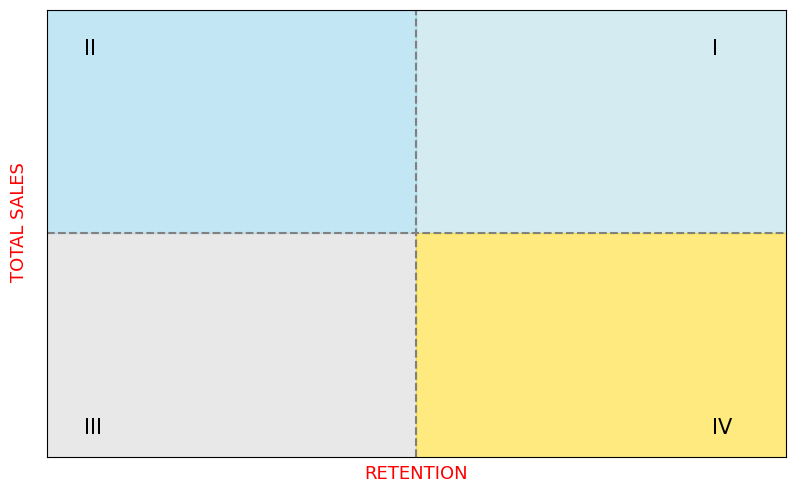

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

colors = ['skyblue', 'lightblue', 'lightgrey', 'gold']
regions = [
    (-0.1, 0.5, 0.6, 0.5),  # ATTACK
    (0.5, 0.5, 0.6, 0.5),   # PROTECT
    (-0.1, -0.1, 0.6, 0.6), # DISTRACT
    (0.5, -0.1, 0.6, 0.6)   # IMPROVE
]

for color, (x, y, w, h) in zip(colors, regions):
    ax.add_patch(patches.Rectangle((x, y), w, h, color=color, alpha=0.5))

#add data


#------------------
ax.text(0.05, 0.9, 'II', fontsize=15, color='black')
ax.text(0.9, 0.9, 'I', fontsize=15, color='black')
ax.text(0.05, 0.05, 'III', fontsize=15, color='black')
ax.text(0.9, 0.05, 'IV', fontsize=15, color='black')

plt.axhline(y=0.5, color='gray', linestyle='--')  # Đường ngang (Impact trung bình)
plt.axvline(x=0.5, color='gray', linestyle='--')  # Đường dọc (Effort trung bình)
ax.set_xticks([])
ax.set_yticks([])

ax.text(-0.05, 0.4, 'TOTAL SALES', rotation=90, fontsize=13, color='red')
ax.text(0.43, -0.05, 'RETENTION', fontsize=13, color='red')

plt.tight_layout()
plt.show()